<a href="https://colab.research.google.com/github/sugar100/Section-Project/blob/main/AI_03_%EB%B0%B1%EC%84%A4_section01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. 지역에 따라서 선호하는 게임 장르가 다른가? 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# 데이터 불러오기
df = pd.read_csv('/content/vgames2.csv', index_col=0)
df = df.dropna(how='any')   #결측치 있는 행 제거



In [ ]:
# 단위 M으로 통일. M은 그냥 제거하고 K는 나누기 1000 해서 M단위로 변환

df['NA_Sales'] = df['NA_Sales'].replace({'K': '/ 1e3','M':''}, regex=True).map(pd.eval).astype(float)
df['EU_Sales'] = df['EU_Sales'].replace({'K': '/ 1e3','M':''}, regex=True).map(pd.eval).astype(float)
df['JP_Sales'] = df['JP_Sales'].replace({'K': '/ 1e3','M':''}, regex=True).map(pd.eval).astype(float)
df['Other_Sales'] = df['Other_Sales'].replace({'K': ' /1e3','M':''}, regex=True).map(pd.eval).astype(float)


In [ ]:
# Year 결측치 제거
df['Year'] = df['Year'].astype(float)
is_Year = df['Year'] > 1900
df = df[is_Year]
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 1 : 지역에 따라서 선호하는 게임 장르 (지역 판매량 & 장르 추출)

Genre_NA = df.loc[:,('Genre','NA_Sales')]   
Genre_EU = df.loc[:,('Genre','EU_Sales')]
Genre_JP = df.loc[:,('Genre','JP_Sales')]
Genre_Other = df.loc[:,('Genre','Other_Sales')]

r = df.loc[:,('Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales')]


In [ ]:
# groupby

grouped_NA = Genre_NA.groupby(['Genre']).sum().reset_index()
grouped_EU  = Genre_EU.groupby(['Genre']).sum().reset_index()
grouped_JP  = Genre_JP.groupby(['Genre']).sum().reset_index()
grouped_Other  = Genre_Other.groupby(['Genre']).sum().reset_index()

rg = r.groupby(['Genre']).mean()  #세 그룹의 평균값

In [ ]:
#ANOVA P-value 확인

from scipy.stats import f_oneway

F_statistic, pVal = f_oneway(rg['NA_Sales'],rg['EU_Sales'],rg['JP_Sales'],rg['Other_Sales'])  #3 sample 평균값 anova
print('F={0:1f},p={1:3f}'.format(F_statistic, pVal))

F=19.253764,p=0.000000


In [ ]:
#귀무가설 : 지역에 따라서 선호하는 장르는 같다. (지역에 따른 장르 간의 차이는 없다.)
#대립가설 : 지역에 따라서 선호하는 장르가 있다. (지역에 따른 장르 간의 차이가 있다.)
if pVal < 0.05:
  print("대립가설 채택")
else:
  print("귀무가설 채택")

대립가설 채택


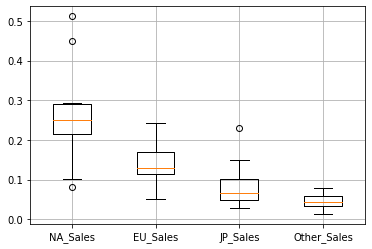

In [ ]:
# anova 시각화

sales = 'NA_Sales','EU_Sales','JP_Sales','Other_Sales'
plot_data = [rg['NA_Sales'],rg['EU_Sales'],rg['JP_Sales'],rg['Other_Sales']]
plt.boxplot(plot_data)
plt.xticks([1,2,3,4],['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
plt.grid(True)
plt.show()

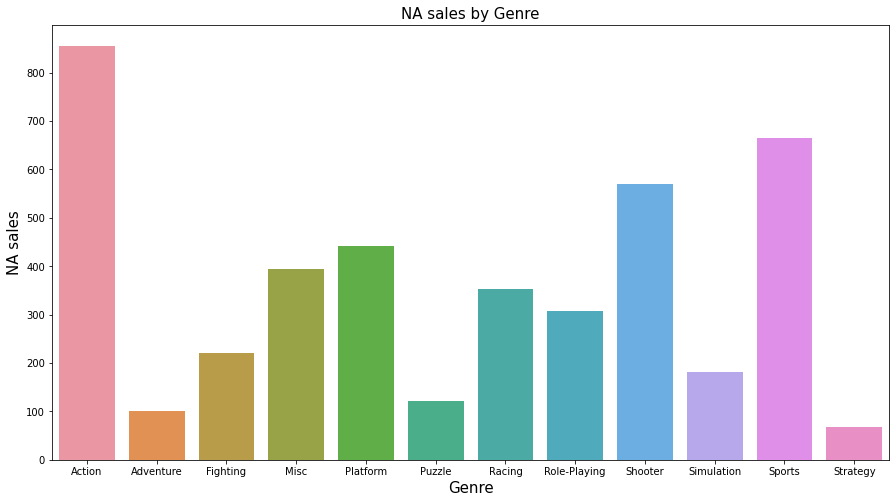

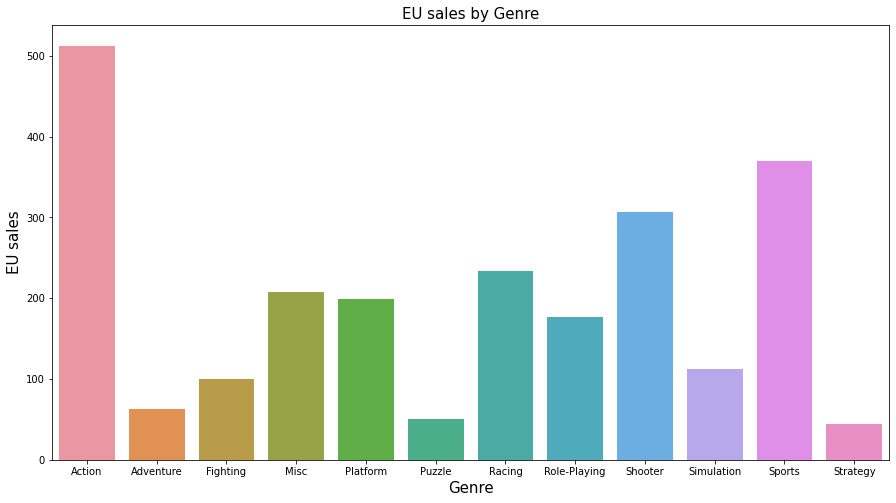

In [ ]:
#북미 장르별 판매량
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(data = grouped_NA, x='Genre', y='NA_Sales')
plt.xlabel('Genre',fontsize=15)
plt.ylabel('NA sales',fontsize=15)
plt.title('NA sales by Genre',fontsize=15)
plt.show()

#유럽 장르별 판매량
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(data = grouped_EU, x='Genre', y='EU_Sales')
plt.xlabel('Genre',fontsize=15)
plt.ylabel('EU sales',fontsize=15)
plt.title('EU sales by Genre',fontsize=15)
plt.show()

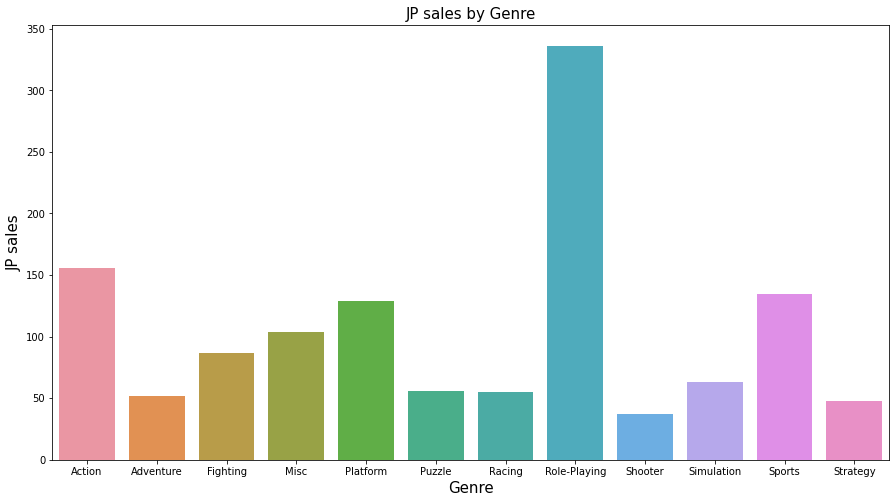

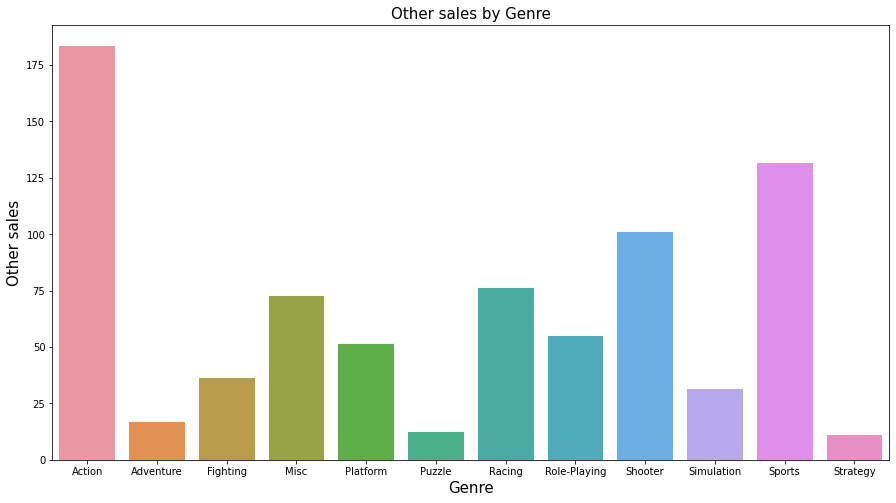

In [ ]:
#일본 장르별 판매량
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(data = grouped_JP, x='Genre', y='JP_Sales')
plt.xlabel('Genre',fontsize=15)
plt.ylabel('JP sales',fontsize=15)
plt.title('JP sales by Genre',fontsize=15)
plt.show()

#기타 장르별 판매량
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(data = grouped_Other, x='Genre', y='Other_Sales')
plt.xlabel('Genre',fontsize=15)
plt.ylabel('Other sales',fontsize=15)
plt.title('Other sales by Genre',fontsize=15)
plt.show()

In [ ]:
# 2 연도별 게임 트렌드 

#df['Year'] = df['Year'].astype(int)

y = df.loc[:,('Year','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales')]


In [ ]:
y['total_sales'] = y['NA_Sales'] + y['EU_Sales'] +  y['JP_Sales'] +  y['Other_Sales'] # 총 판매량 계산


In [ ]:
y = y.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis = 1) # 총 판매량만 표에 남기기


In [ ]:
# 연도별 장르 총 판매량


gy = y.groupby(['Genre','Year']).sum().reset_index()



first_year = gy['Year'] < 2000
gy_1999 = gy[first_year]
gy_1999


second_year = gy['Year'] > 2000
gy_2000 = gy[second_year]
gy_2000


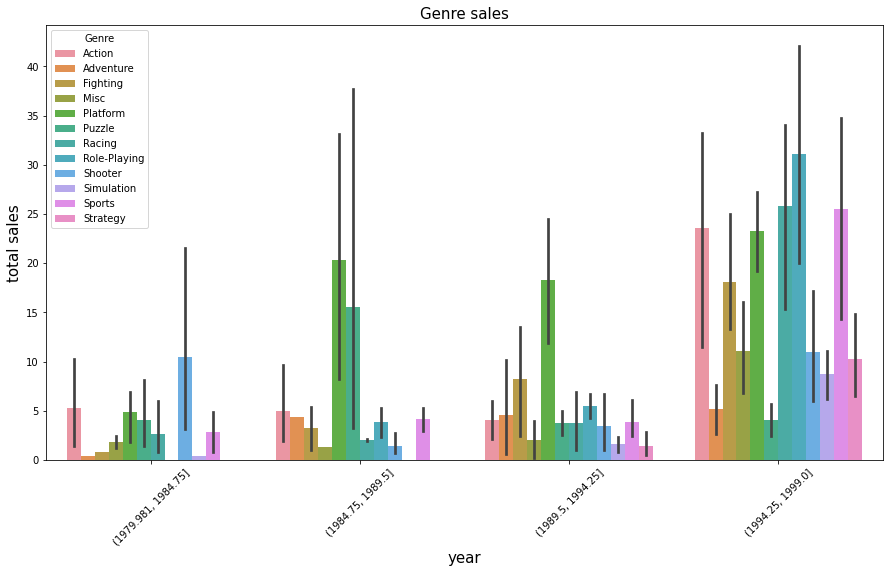

In [ ]:
# 2000년도 이전 장르별 총 판매량

genre_year_sales = gy_1999[['Genre','Year','total_sales']]
genre_year_sales['Year_Group'] = pd.cut(genre_year_sales['Year'],4)

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data = genre_year_sales, x='Year_Group', y='total_sales', hue='Genre')
plt.xlabel('year',fontsize=15)
plt.ylabel('total sales',fontsize=15)
plt.title('Genre sales',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=10,rotation=45)
plt.show()

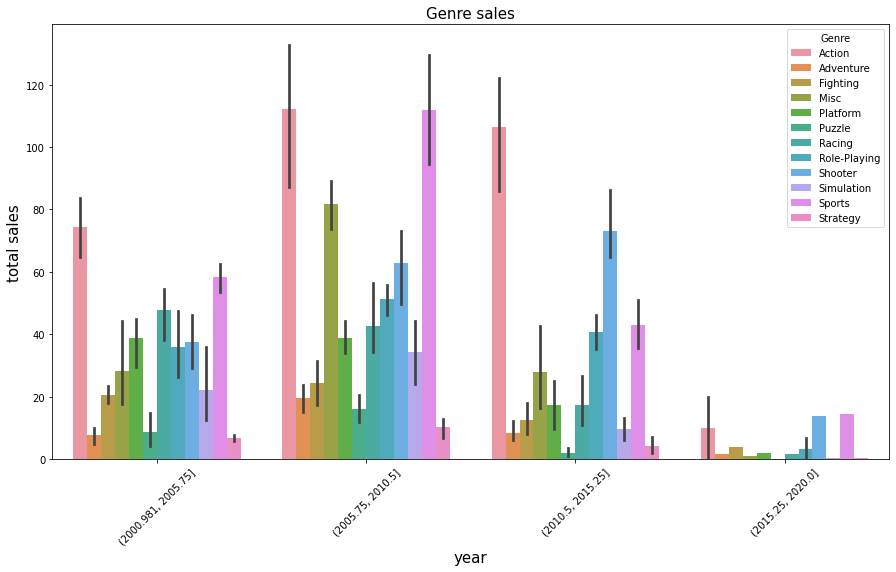

In [ ]:
# 2000년 이후 게임 연도에 따른 장르별 판매량


genre_year_sales = gy_2000[['Genre','Year','total_sales']]
genre_year_sales['Year_Group'] = pd.cut(genre_year_sales['Year'],4)

fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(data = genre_year_sales, x='Year_Group', y='total_sales', hue='Genre')
plt.xlabel('year',fontsize=15)
plt.ylabel('total sales',fontsize=15)
plt.title('Genre sales',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=10,rotation=45)
plt.show()

In [ ]:
#장르별 총 판매량

genre_table = pd.pivot_table(data=gy,index=['Genre']).reset_index()

#genre_table['rank'] = genre_table['total_sales'].rank(ascending = False)

genretable = genre_table.sort_values('total_sales', ascending=False).head(10)


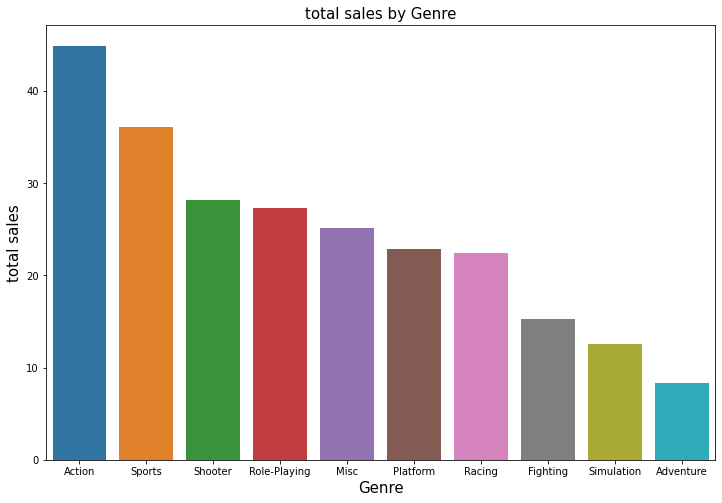

In [ ]:
#장르별 총 판매량 시각화(top10)

fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(data = genretable, x='Genre', y='total_sales')
plt.xlabel('Genre',fontsize=15)
plt.ylabel('total sales',fontsize=15)
plt.title('total sales by Genre',fontsize=15)
plt.show()

In [ ]:
#연도별 총 판매량 시각화

year_table = pd.pivot_table(data=gy,index=['Year']).reset_index()
year_table

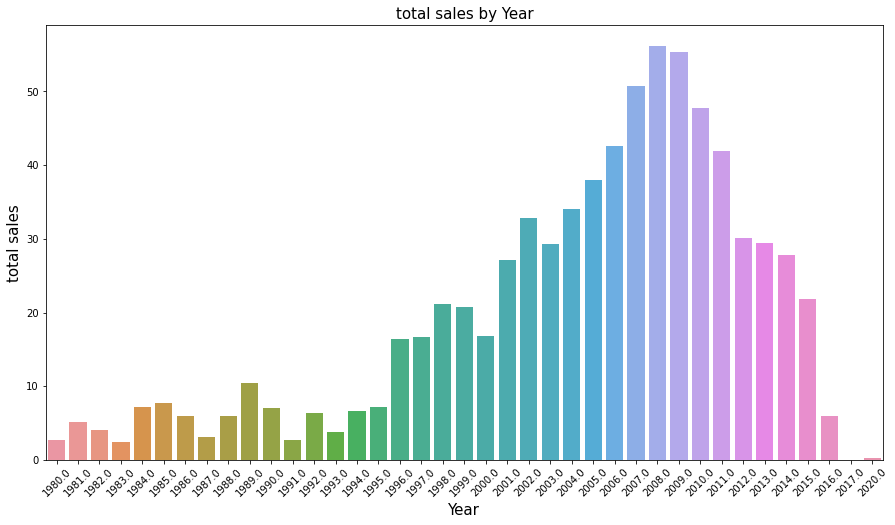

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(data = year_table, x='Year', y='total_sales')
plt.xlabel('Year',fontsize=15)
plt.ylabel('total sales',fontsize=15)
plt.title('total sales by Year',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=10,rotation=45) # x -label 
plt.show()

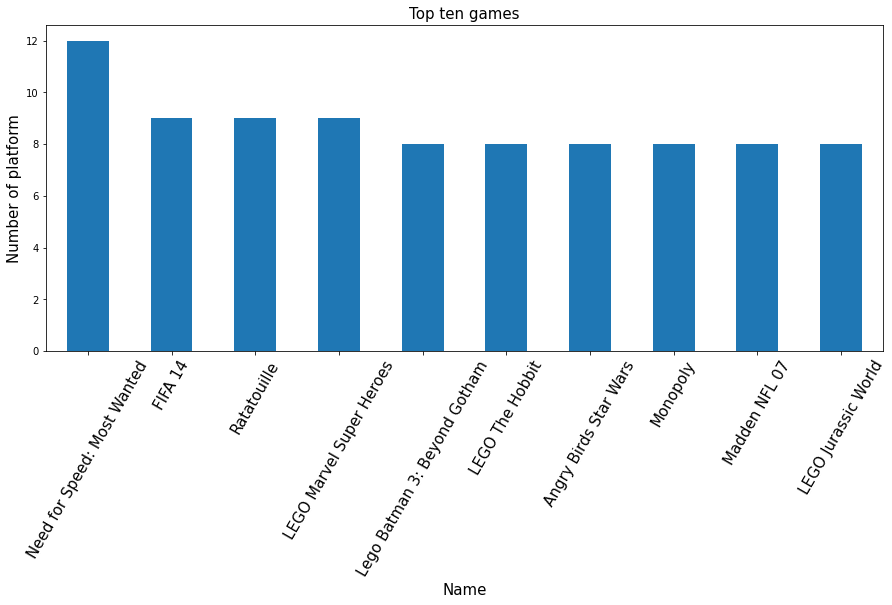

In [ ]:
# 게임 전체 출고량 
top_platform = df['Name'].value_counts(sort=True)
fig,ax=plt.subplots(figsize=(15,6))
top_platform[:10].plot(kind='bar',ax=ax)
plt.title('Top ten games',fontsize=15)
plt.ylabel('Number of platform',fontsize=15)
plt.xlabel('Name',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=15,rotation=60)


In [ ]:
# 3. 연도별 게임 출고량


game_NA = df.loc[:,('Name','Year','NA_Sales')].groupby(['Name','Year']).sum().reset_index()
game_EU = df.loc[:,('Name','Year','EU_Sales')].groupby(['Name','Year']).sum().reset_index()
game_JP = df.loc[:,('Name','Year','JP_Sales')].groupby(['Name','Year']).sum().reset_index()
game_Other = df.loc[:,('Name','Year','Other_Sales')].groupby(['Name','Year']).sum().reset_index()


game_NA

,Name,Year,NA_Sales
0,'98 Koshien,1998.0,0.15
1,.hack//G.U. Vol.1//Rebirth,2006.0,0.00
2,.hack//G.U. Vol.2//Reminisce,2006.0,0.11
3,.hack//G.U. Vol.2//Reminisce (jp sales),2006.0,0.00
4,.hack//G.U. Vol.3//Redemption,2007.0,0.00
...,...,...,...
11993,thinkSMART FAMILY!,2010.0,0.03
11994,thinkSMART: Chess for Kids,2011.0,0.01
11995,uDraw Studio,2010.0,1.67
11996,uDraw Studio: Instant Artist,2011.0,0.09


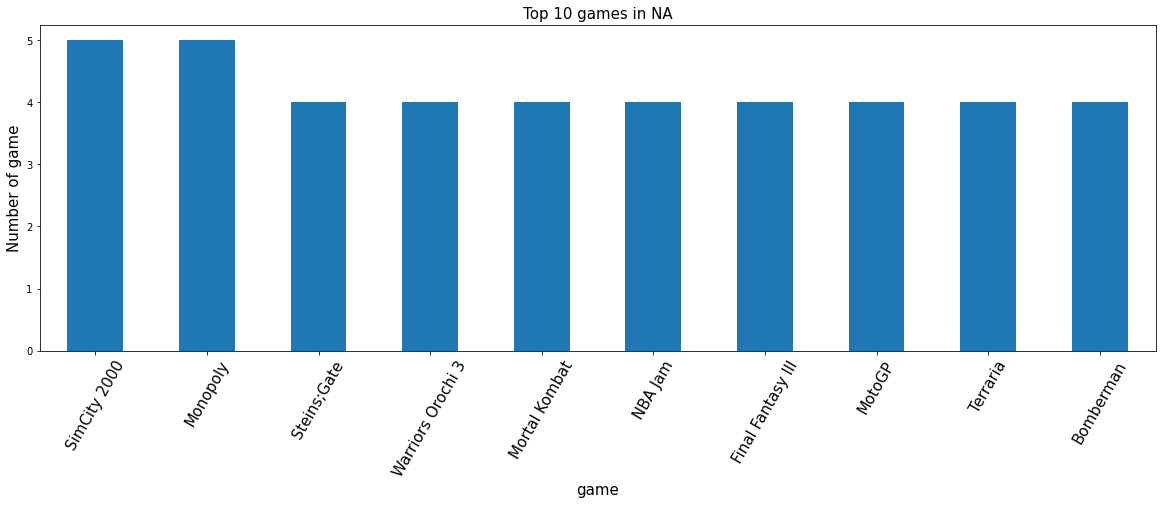

In [ ]:
# NA 게임 출고량

top_platform = game_NA['Name'].value_counts(sort=True)
fig,ax=plt.subplots(figsize=(20,6))
top_platform[:10].plot(kind='bar',ax=ax)
plt.title('Top 10 games in NA',fontsize=15)
plt.ylabel('Number of game',fontsize=15)
plt.xlabel('game',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=15,rotation=60)


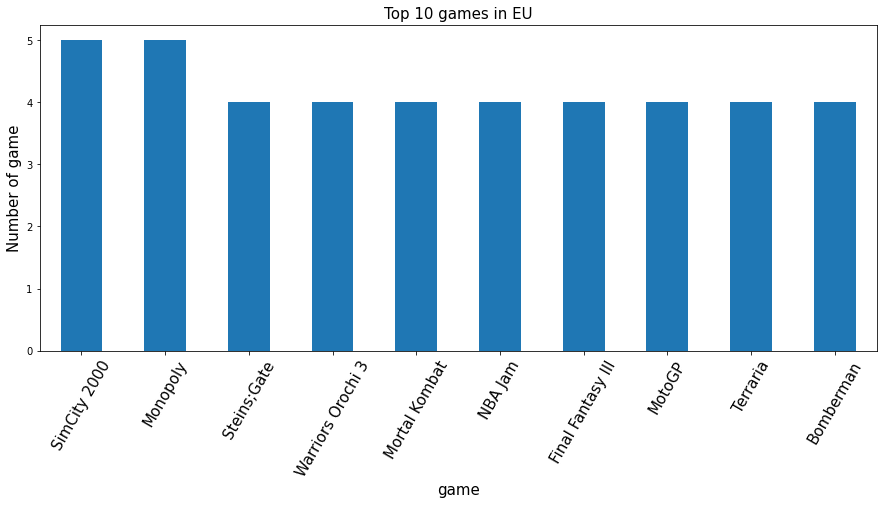

In [ ]:
# EU 게임 출고량

top_platform = game_EU['Name'].value_counts(sort=True)
fig,ax=plt.subplots(figsize=(15,6))
top_platform[:10].plot(kind='bar',ax=ax)
plt.title('Top 10 games in EU',fontsize=15)
plt.ylabel('Number of game',fontsize=15)
plt.xlabel('game',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=15,rotation=60)

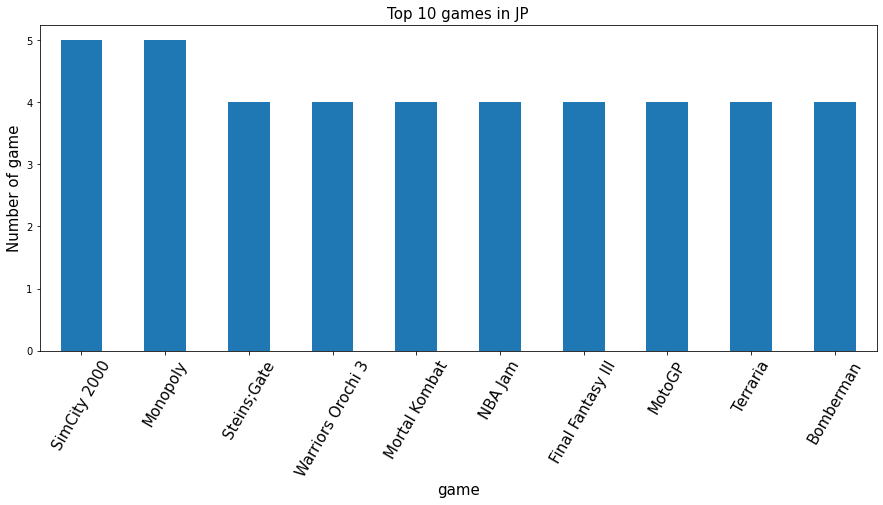

In [ ]:
# JP 게임 출고량

top_platform = game_JP['Name'].value_counts(sort=True)
fig,ax=plt.subplots(figsize=(15,6))
top_platform[:10].plot(kind='bar',ax=ax)
plt.title('Top 10 games in JP',fontsize=15)
plt.ylabel('Number of game',fontsize=15)
plt.xlabel('game',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=15,rotation=60)

In [ ]:
# NA 게임 출고량

top_platform = game_NA['Name'].value_counts(sort=True)
fig,ax=plt.subplots(figsize=(15,6))
top_platform[:10].plot(kind='bar',ax=ax)
plt.title('Top 10 games in NA',fontsize=15)
plt.ylabel('Number of game',fontsize=15)
plt.xlabel('game',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=15,rotation=60)

In [ ]:
# 플랫폼별 판매량
platform_table = pd.pivot_table(data=gy,index=['Platform']).reset_index()


#시각화
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(data = platform_table, x='Platform', y='total_sales')
plt.xlabel('Platform',fontsize=15)
plt.ylabel('total sales',fontsize=15)
plt.title('total sales by Platform',fontsize=15)
plt.show()

KeyError: ignored

In [ ]:
# 연도별 플랫폼 판매량

platform_year_sales = [['Platform','Year','total_sales']]
platform_year_sales['Year_Group'] = pd.cut(platform_year_sales['Year'],10)

fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(data = platform_year_sales, x='Year_Group', y='total_sales', hue = 'Platform')
plt.ylabel('total sales',fontsize=15)
plt.title('Platform sales',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=10,rotation=45)
plt.show()

TypeError: ignored

In [ ]:
# 지역 판매량 & 플랫폼 추출 
Platform_NA = df.loc[:,('Platform','NA_Sales')]
Platform_EU = df.loc[:,('Platform','EU_Sales')]
Platform_JP = df.loc[:,('Platform','JP_Sales')]
Platform_Other = df.loc[:,('Platform','Other_Sales')]

#groupby
p_grouped_NA = Platform_NA.groupby(['Platform']).sum().reset_index()
p_grouped_EU  = Platform_EU.groupby(['Platform']).sum().reset_index()
p_grouped_JP  = Platform_JP.groupby(['Platform']).sum().reset_index()
p_grouped_Other  = Platform_Other.groupby(['Platform']).sum().reset_index()



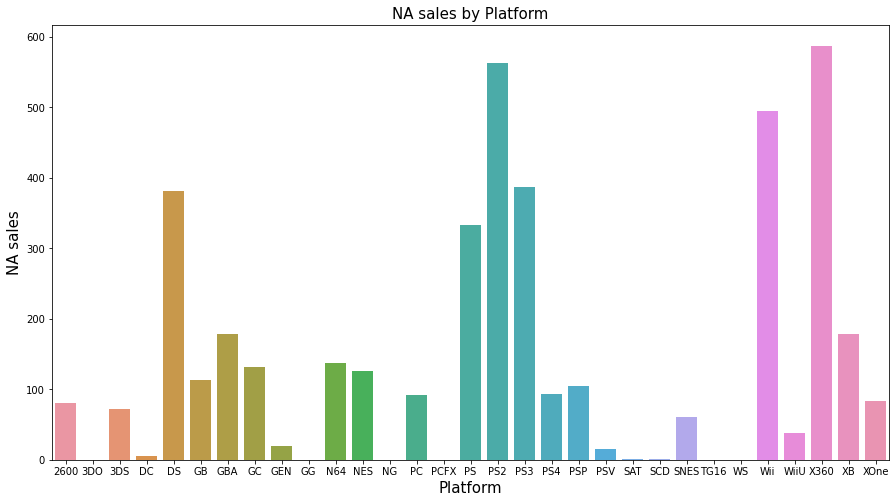

In [ ]:
#p_grouped_NA 시각화
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(data = p_grouped_NA, x='Platform', y='NA_Sales')
plt.xlabel('Platform',fontsize=15)
plt.ylabel('NA sales',fontsize=15)
plt.title('NA sales by Platform',fontsize=15)
plt.show()

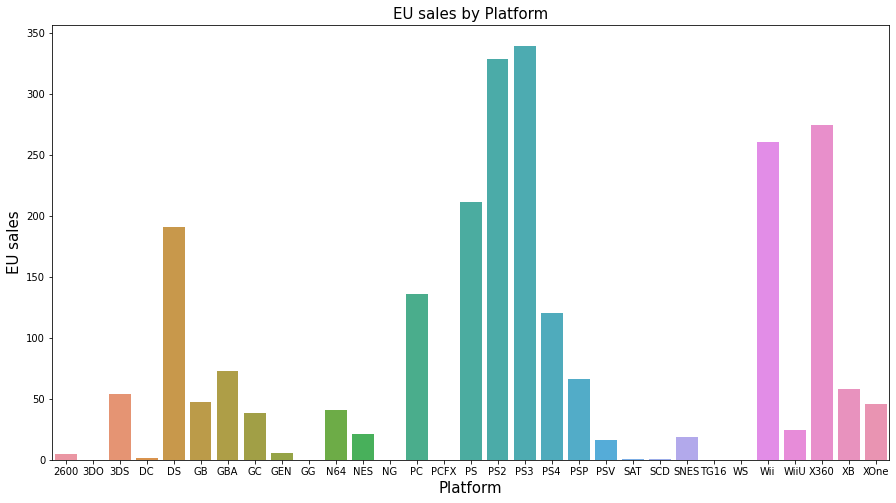

In [ ]:
#p_grouped_EU 시각화
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(data = p_grouped_EU, x='Platform', y='EU_Sales')
plt.xlabel('Platform',fontsize=15)
plt.ylabel('EU sales',fontsize=15)
plt.title('EU sales by Platform',fontsize=15)
plt.show()

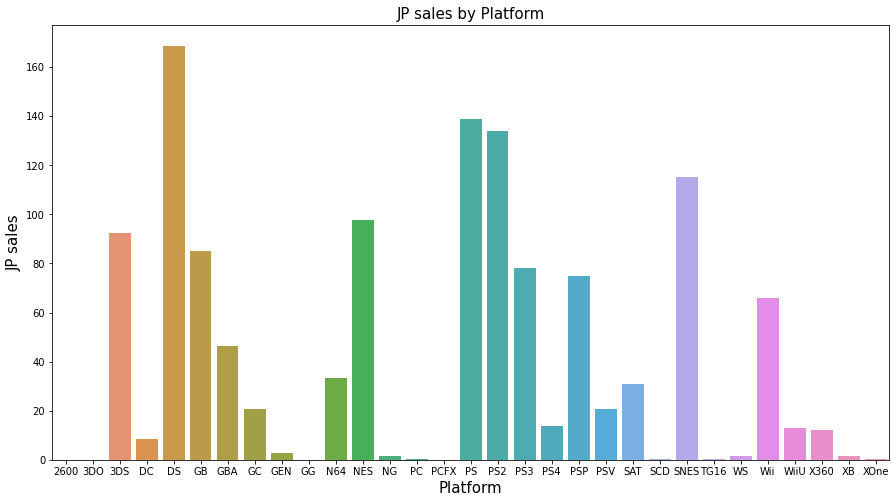

In [ ]:
#p_grouped_JP 시각화
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(data = p_grouped_JP, x='Platform', y='JP_Sales')
plt.xlabel('Platform',fontsize=15)
plt.ylabel('JP sales',fontsize=15)
plt.title('JP sales by Platform',fontsize=15)
plt.show()

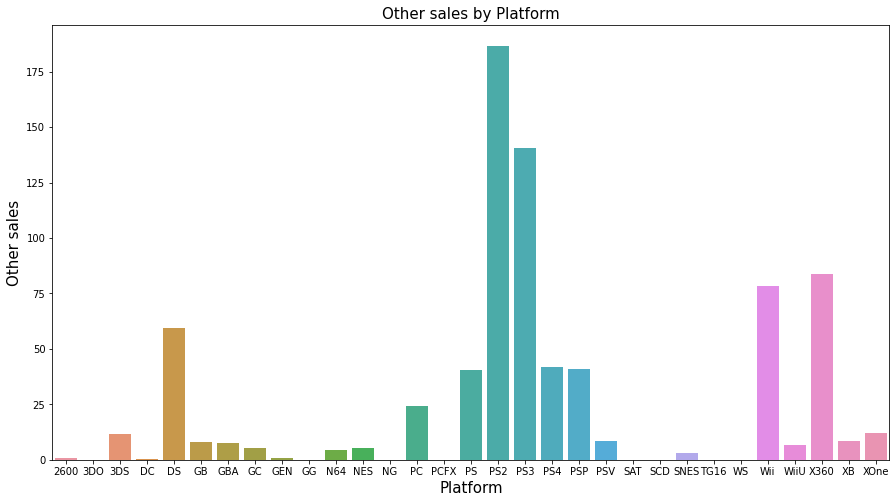

In [ ]:
#Other_grouped_JP 시각화
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(data = p_grouped_Other, x='Platform', y='Other_Sales')
plt.xlabel('Platform',fontsize=15)
plt.ylabel('Other sales',fontsize=15)
plt.title('Other sales by Platform',fontsize=15)
plt.show()

In [ ]:
# 연도별 판매량 & 플랫폼 추출 
yp_NA = df.loc[:,('Year','Platform','NA_Sales')]
yp_EU = df.loc[:,('Year','Platform','EU_Sales')]
yp_JP = df.loc[:,('Year','Platform','JP_Sales')]
yp_Other = df.loc[:,('Year','Platform','Other_Sales')]

#groupby
yp_grouped_NA = yp_NA.groupby(['Platform','Year']).sum().reset_index()
yp_grouped_EU  = yp_EU.groupby(['Platform','Year']).sum().reset_index()
yp_grouped_JP  = yp_JP.groupby(['Platform','Year']).sum().reset_index()
yp_grouped_Other  = yp_Other.groupby(['Platform','Year']).sum().reset_index()
yp_grouped_NA

In [ ]:
#2000년도 이후 NA year

NA_year = yp_grouped_NA['Year'] > 2010
NA_2000 = yp_grouped_NA[NA_year]
NA_2000



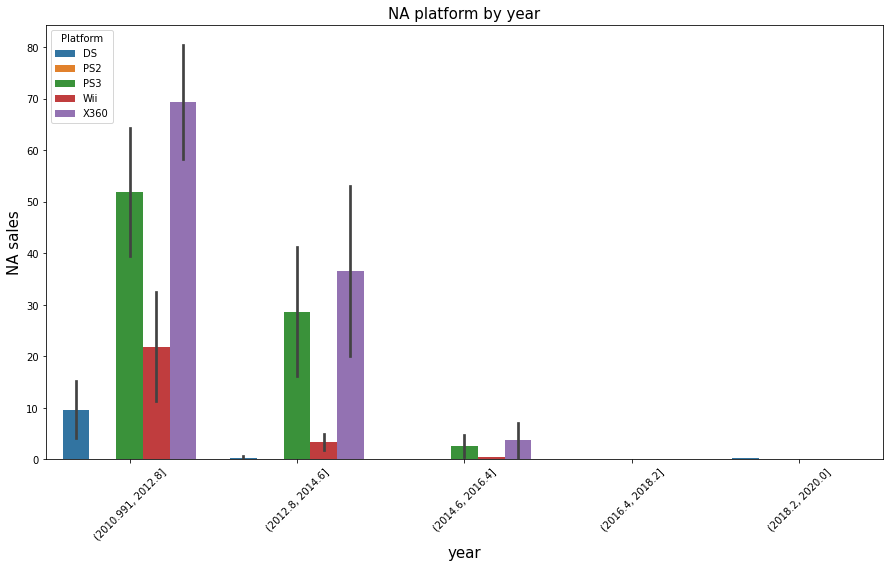

In [ ]:
# 2000년도 이후 NA 시각화

NA_year_sales = NA_2000[['Platform','Year','NA_Sales']]
NA_year_sales['Year_Group'] = pd.cut(NA_year_sales['Year'],5)
NA_year_sales = NA_year_sales.loc[(NA_year_sales['Platform']=='X360') |
                        (NA_year_sales['Platform']=='PS2')|
                      (NA_year_sales['Platform']=='Wii')|(NA_year_sales['Platform']=='PS3')| (NA_year_sales['Platform']=='DS'), :]
                       #publisher를 top5만 사용

fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(data = NA_year_sales, x='Year_Group', y='NA_Sales', hue='Platform')
plt.xlabel('year',fontsize=15)
plt.ylabel('NA sales',fontsize=15)
plt.title('NA platform by year',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=10,rotation=45)
plt.show()




In [ ]:
#2000년도 이후 EU year

EU_year = yp_grouped_EU['Year'] > 2010
EU_2000 = yp_grouped_EU[EU_year]


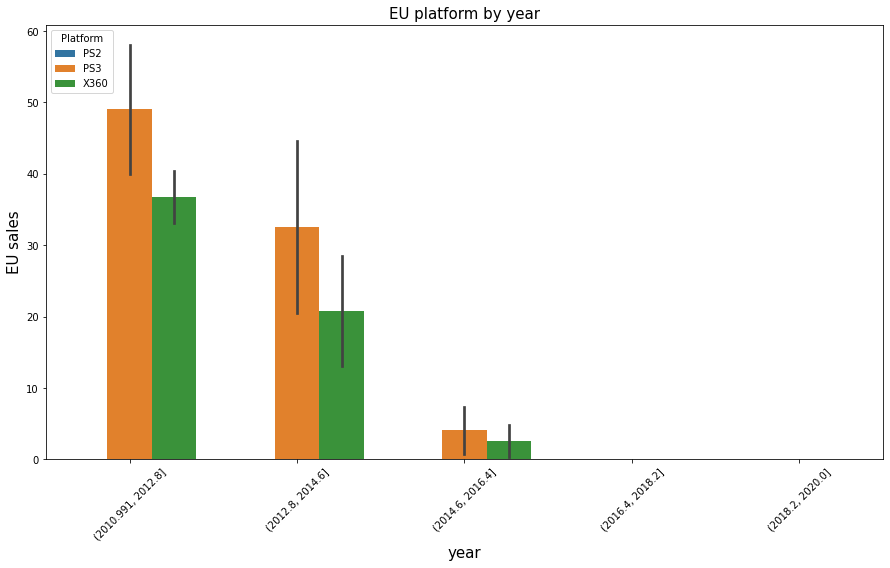

In [ ]:
# 2000년도 이후 EU 시각화

EU_year_sales = EU_2000[['Platform','Year','EU_Sales']]
EU_year_sales['Year_Group'] = pd.cut(EU_year_sales['Year'],5)
EU_year_sales = EU_year_sales.loc[(EU_year_sales['Platform']=='PS3') |
                        (EU_year_sales['Platform']=='PS2')|
                      (EU_year_sales['Platform']=='X360')|(EU_year_sales['Platform']=='WII')| (EU_year_sales['Platform']=='PS'), :]
                       #publisher를 top5만 사용


fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(data = EU_year_sales, x='Year_Group', y='EU_Sales', hue='Platform')
plt.xlabel('year',fontsize=15)
plt.ylabel('EU sales',fontsize=15)
plt.title('EU platform by year',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=10,rotation=45)
plt.show()


In [ ]:
#2000년도 이후 JP year

JP_year = yp_grouped_JP['Year'] > 2010
JP_2000 = yp_grouped_JP[NA_year]


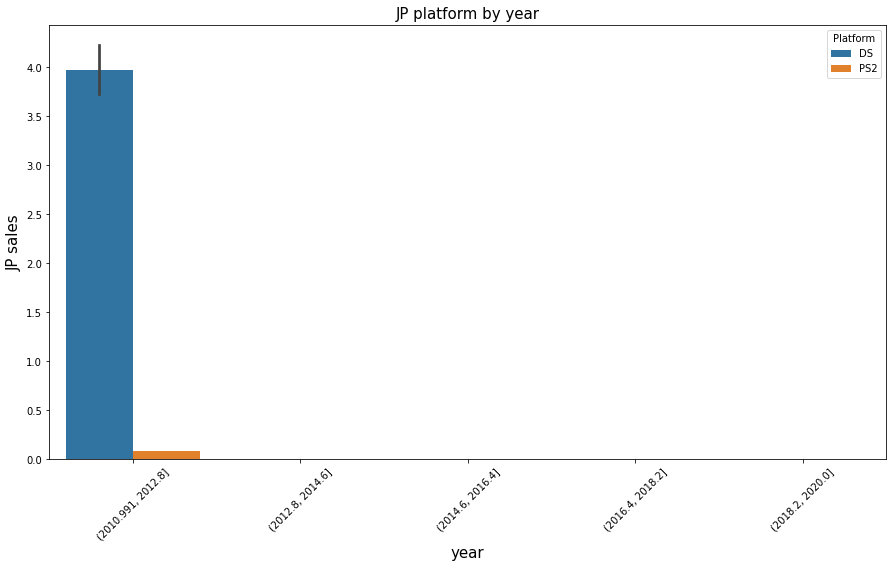

In [ ]:
# 2000년도 이후 JP 시각화

JP_year_sales = JP_2000[['Platform','Year','JP_Sales']]
JP_year_sales['Year_Group'] = pd.cut(JP_year_sales['Year'],5)
JP_year_sales = JP_year_sales.loc[(JP_year_sales['Platform']=='DS') |
                        (JP_year_sales['Platform']=='PS')|
                      (JP_year_sales['Platform']=='PS2')|(JP_year_sales['Platform']=='SNES')| (JP_year_sales['Platform']=='NES'), :]
                       #publisher를 top5만 사용

fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(data = JP_year_sales, x='Year_Group', y='JP_Sales', hue='Platform')
plt.xlabel('year',fontsize=15)
plt.ylabel('JP sales',fontsize=15)
plt.title('JP platform by year',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=10,rotation=45)
plt.show()

In [ ]:
#2000년도 이후 Other year

Other_year = yp_grouped_Other['Year'] > 2010
Other_2000 = yp_grouped_Other[NA_year]


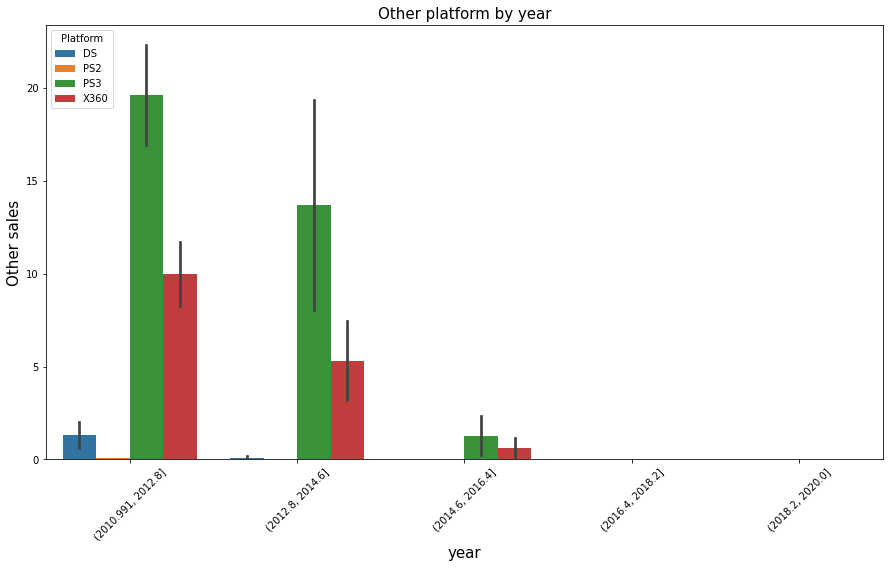

In [ ]:
# 2000년도 이후 Other 시각화

Other_year_sales = Other_2000[['Platform','Year','Other_Sales']]
Other_year_sales['Year_Group'] = pd.cut(Other_year_sales['Year'],5)
Other_year_sales = Other_year_sales.loc[(Other_year_sales['Platform']=='PS2') |
                        (Other_year_sales['Platform']=='PS3')|
                      (Other_year_sales['Platform']=='X360')|(Other_year_sales['Platform']=='WII')| (Other_year_sales['Platform']=='DS'), :]
                       #publisher를 top5만 사용

fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(data = Other_year_sales, x='Year_Group', y='Other_Sales', hue='Platform')
plt.xlabel('year',fontsize=15)
plt.ylabel('Other sales',fontsize=15)
plt.title('Other platform by year',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=10,rotation=45)
plt.show()

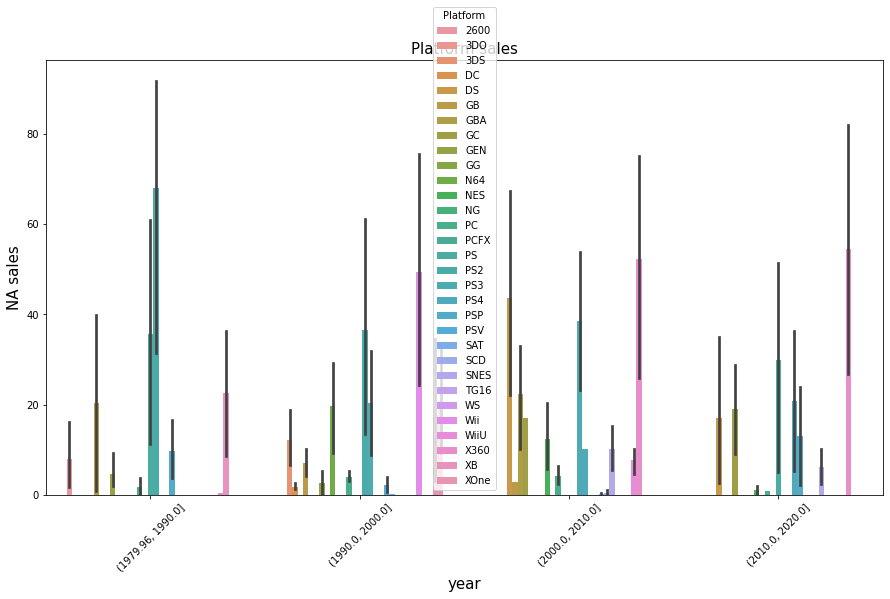

In [ ]:
#시각화
platform_year_sales = yp_grouped_NA[['Platform','Year','NA_Sales']]
platform_year_sales['Year_Group'] = pd.cut(genre_year_sales['Year'],4)



fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data = platform_year_sales, x='Year_Group', y='NA_Sales', hue='Platform')
plt.xlabel('year',fontsize=15)
plt.ylabel('NA sales',fontsize=15)
plt.title('Platform sales',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=10,rotation=45)
plt.show()